In [77]:
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


random.seed(45)
def simulated_annealing(temperature):
    current_r_values = []
    ans_values = []
    ite = []

    i = 0

    current_r = random.uniform(-1, 1)
    # Iterate 1000 times
    for num in range(1000):
        new_r = random.uniform(-1, 1)

        while current_r == new_r:
            new_r = random.uniform(-1, 1)

        def energy_function(x):
            return x ** 2

        f_1 = energy_function(current_r)
        f_2 = energy_function(new_r)

        delta_e = f_2 - f_1

        if delta_e < 0:
            current_r = new_r
        else:
            ans = math.exp(-1 * delta_e / temperature)
            ans_r = random.uniform(0, 1)

            if ans > ans_r:
                current_r = new_r

        i = i + 1
        # Store values for plotting
        current_r_values.append(current_r)
        ans_values.append(energy_function(current_r))
        ite.append(i)

    return [ite, current_r_values, ans_values]




In [78]:
# Example usage:
temperature = 100  # Set your desired temperature here
result = simulated_annealing(temperature)
annealing = pd.DataFrame({
    'Iteration': result[0],
    'Current_r': result[1],
    'Ans_Values': result[2]
})


In [79]:
annealing.head(10)

Iteration  Current_r  Ans_Values
0          1  -0.023944    0.000573
1          2  -0.836241    0.699300
2          3  -0.855333    0.731594
3          4  -0.432299    0.186883
4          5  -0.764587    0.584594
5          6   0.486942    0.237112
6          7  -0.928489    0.862091
7          8  -0.729978    0.532867
8          9   0.590142    0.348268
9         10   0.473935    0.224615

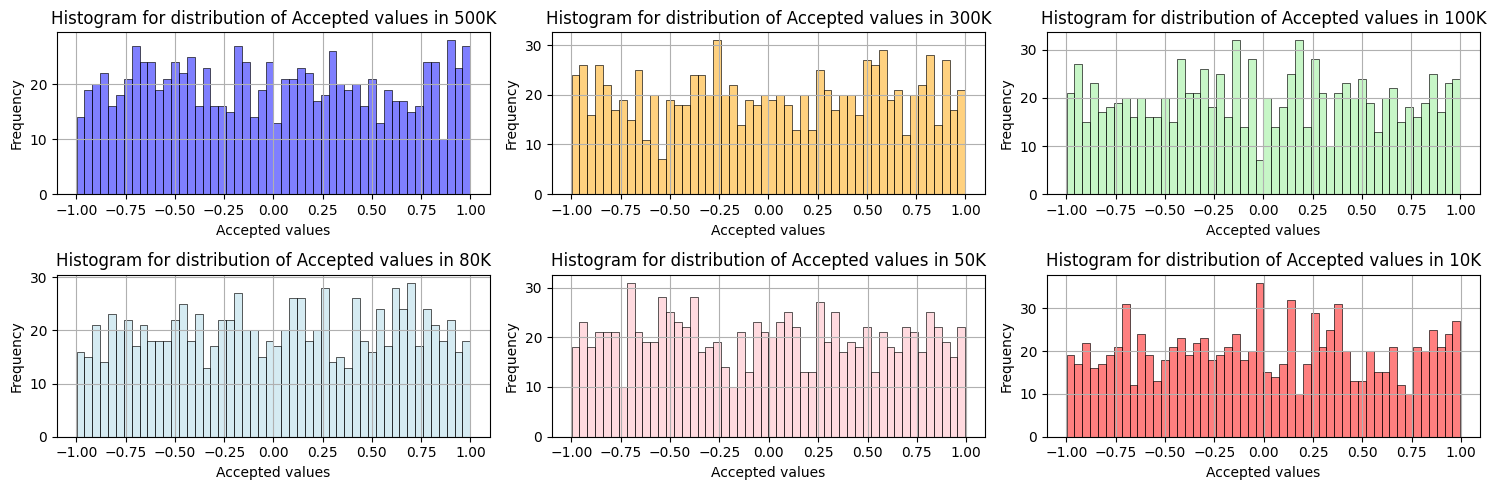

In [80]:
from pickle import TRUE
plt.figure(figsize=(15, 5))  # Adjust figure size

plt.subplot(2, 3, 1)
sns.histplot(simulated_annealing(500)[1], bins=50, color='blue', alpha=0.5, label='100', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 500K')
plt.grid(True)

plt.subplot(2, 3, 2)
sns.histplot(simulated_annealing(300)[1], bins=50, color='orange', alpha=0.5, label='1000', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 300K')
plt.grid(True)

plt.subplot(2, 3, 3)
sns.histplot(simulated_annealing(100)[1], bins=50, color='lightgreen', alpha=0.5, label='1000', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 100K')
plt.grid(True)

plt.subplot(2, 3, 4)
sns.histplot(simulated_annealing(80)[1], bins=50, color='lightblue', alpha=0.5, label='1000', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 80K')
plt.grid(True)

plt.subplot(2, 3, 5)
sns.histplot(simulated_annealing(50)[1], bins=50, color='lightpink', alpha=0.5, label='1000', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 50K')
plt.grid(True)

plt.subplot(2, 3, 6)
sns.histplot(simulated_annealing(10)[1], bins=50, color='red', alpha=0.5, label='1000', edgecolor='black')
plt.xlabel('Accepted values')
plt.ylabel('Frequency')
plt.title('Histogram for distribution of Accepted values in 10K')
plt.grid(True)


plt.tight_layout()
plt.show()

In [81]:
# Call the simulated_annealing function to get the result
result = simulated_annealing(500)

# Compute the mean of each dimension
mean_ite = sum(result[0]) / len(result[0])
mean_current_r = sum(result[1]) / len(result[1])
mean_ans_values = sum(result[2]) / len(result[2])

# Print the means
#print('Mean of Iterations: ', mean_ite)
print('Mean of Current_r: ', mean_current_r)
#print('Mean of Ans_Values: ', mean_ans_values)

Mean of Current_r:  0.01772400584596063


In [82]:
def findmean(temp):
  result = simulated_annealing(500)
  mean_current_r = sum(result[1]) / len(result[1])

  return mean_current_r

In [83]:
temperatures = [500,300,100,80,50,10]

for temp in temperatures:
  print(f"Mean of at temperature {temp}: {findmean(temp)}")

Mean of at temperature 500: 0.0006123491177044649
Mean of at temperature 300: 0.009967370855634105
Mean of at temperature 100: -0.03423279426857496
Mean of at temperature 80: -0.01897055063317084
Mean of at temperature 50: 0.01596072872673032
Mean of at temperature 10: -0.0034652428352485954


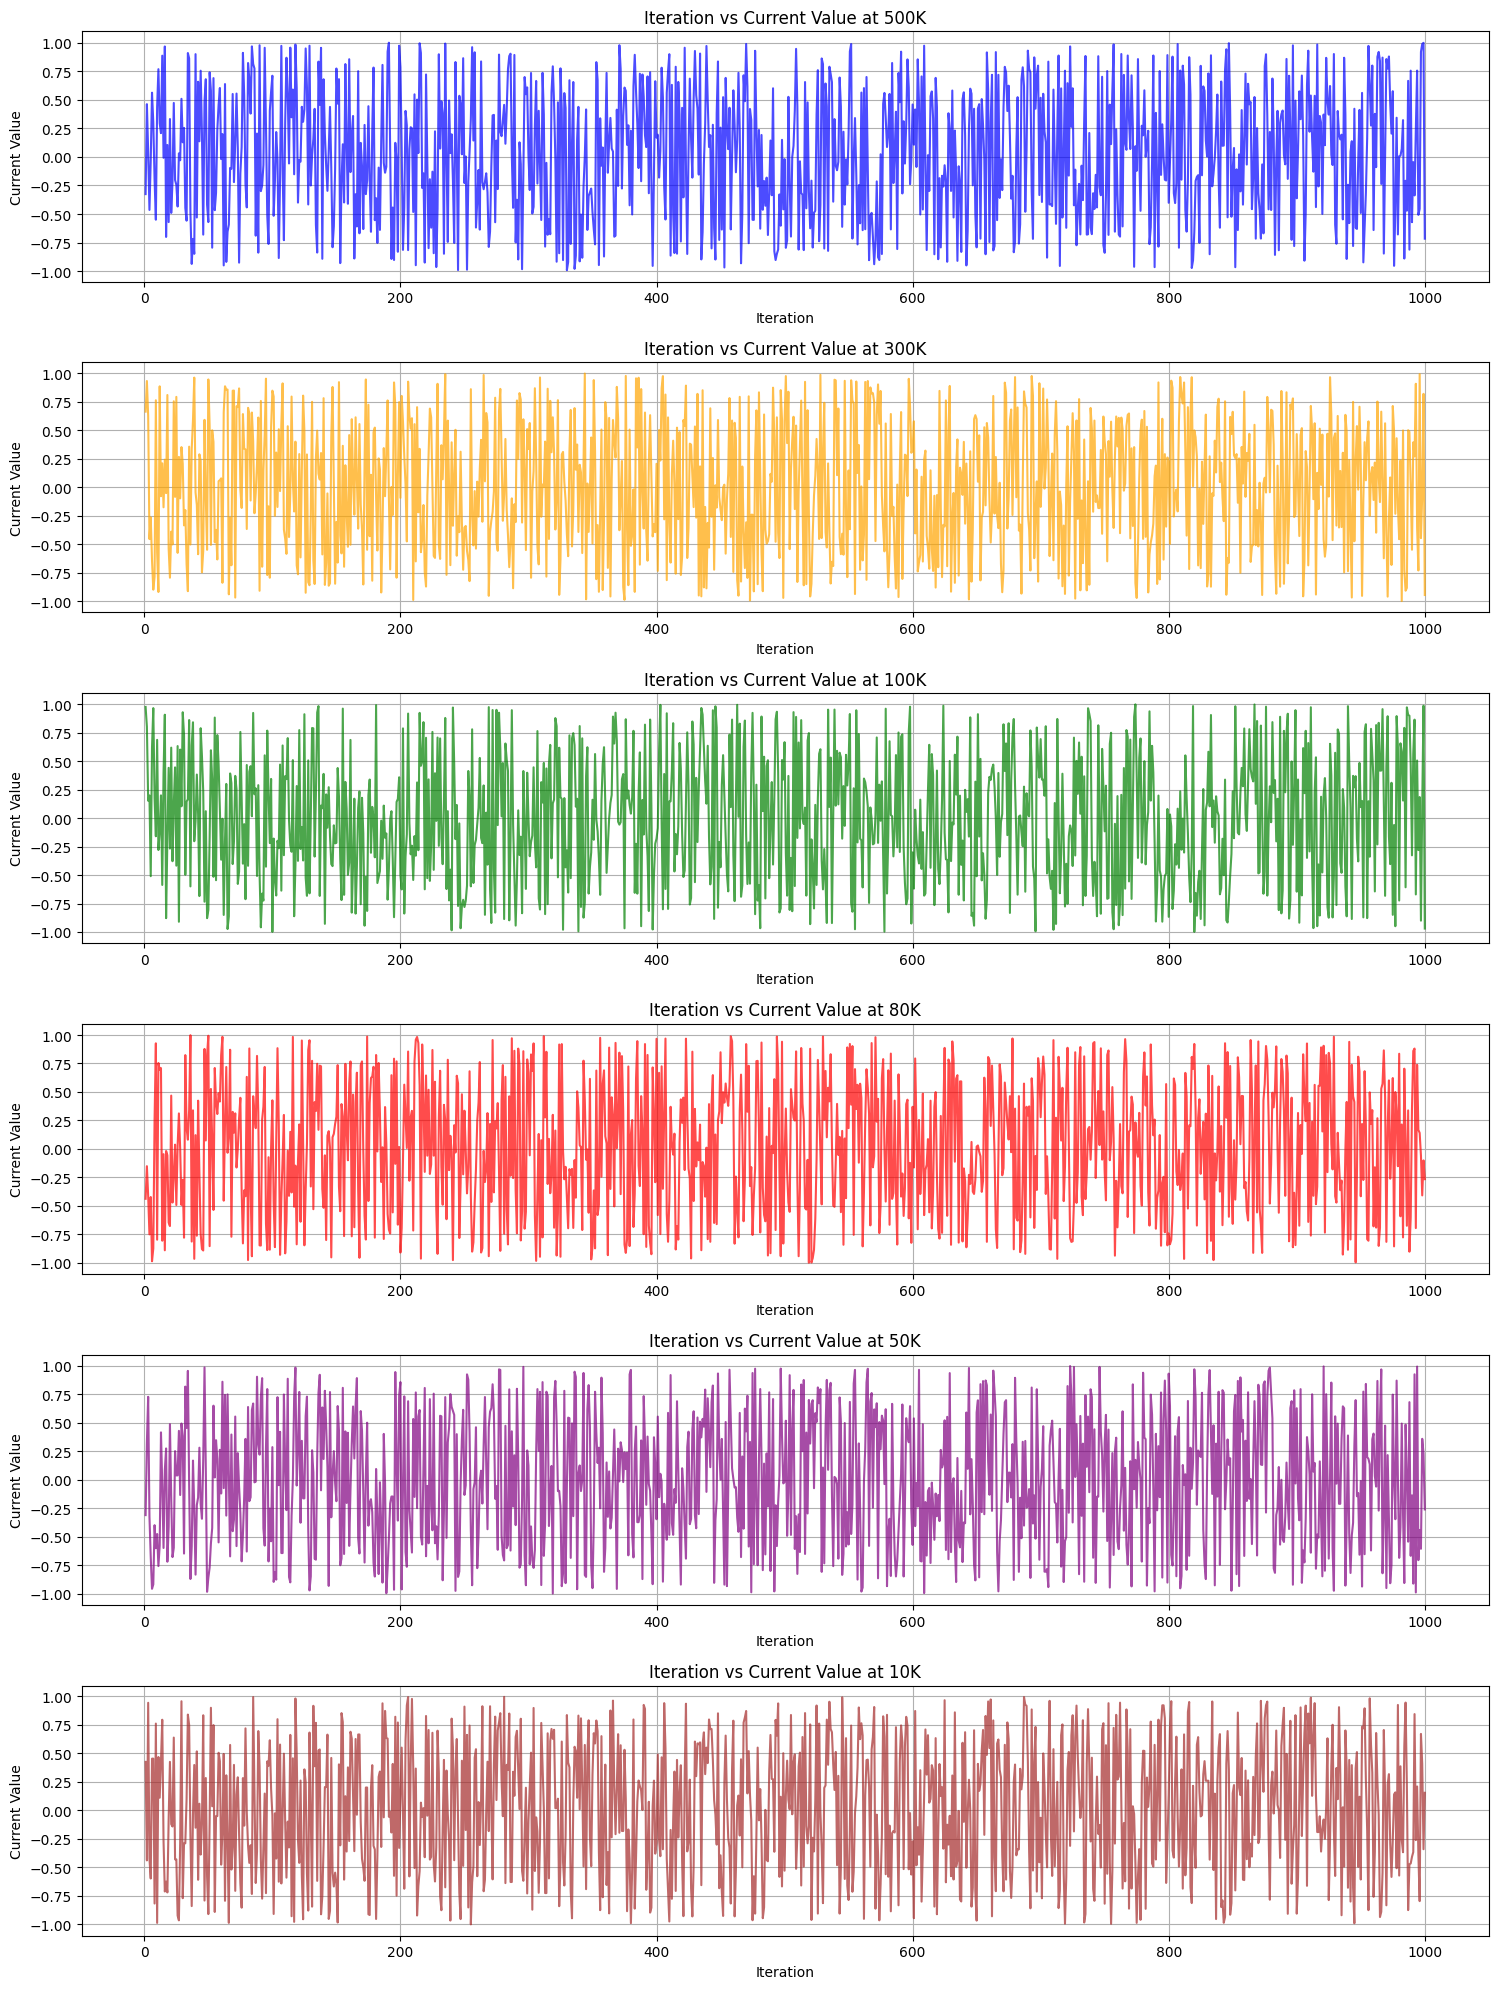

In [84]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(15, 20))

# Flatten the axis for easier indexing
axs = axs.flatten()

for i, (temp, color) in enumerate(zip(temperatures, colors)):
    # Run simulated annealing for current temperature
    result = simulated_annealing(temp)

    # Plot iteration vs current value
    axs[i].plot(result[0], result[1], color=color, alpha=0.7)
    axs[i].set_title(f'Iteration vs Current Value at {temp}K')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Current Value')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

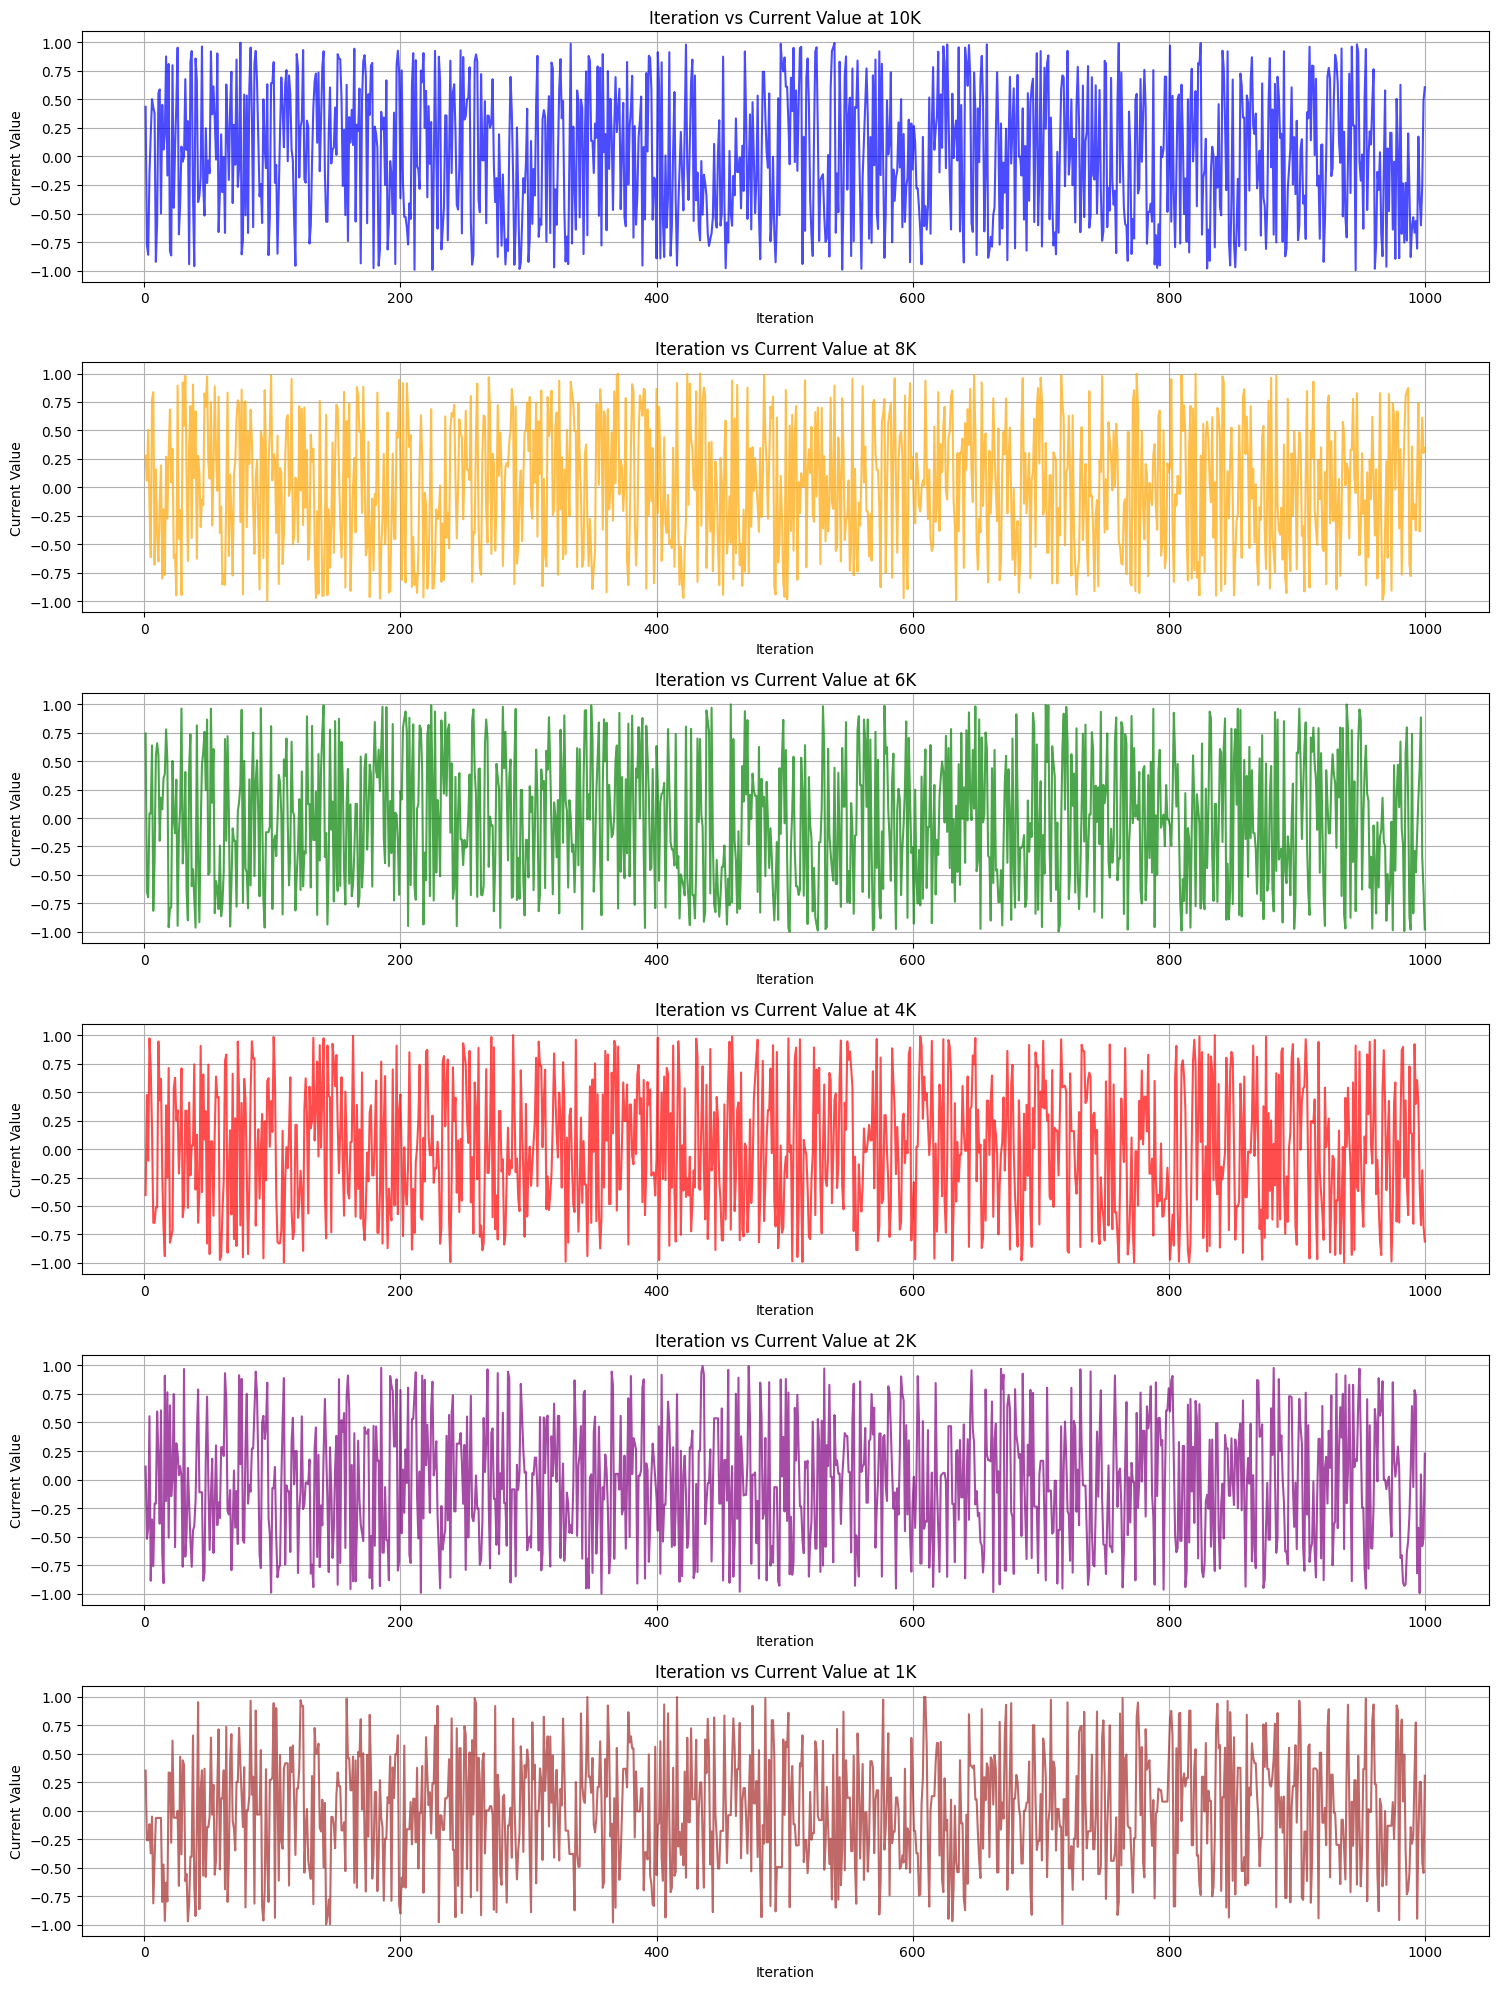

In [85]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
temperature2 = [10,8,6,4,2,1]
# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(15, 20))

# Flatten the axis for easier indexing
axs = axs.flatten()

for i, (temp, color) in enumerate(zip(temperature2, colors)):
    # Run simulated annealing for current temperature
    result = simulated_annealing(temp)

    # Plot iteration vs current value
    axs[i].plot(result[0], result[1], color=color, alpha=0.7)
    axs[i].set_title(f'Iteration vs Current Value at {temp}K')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Current Value')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

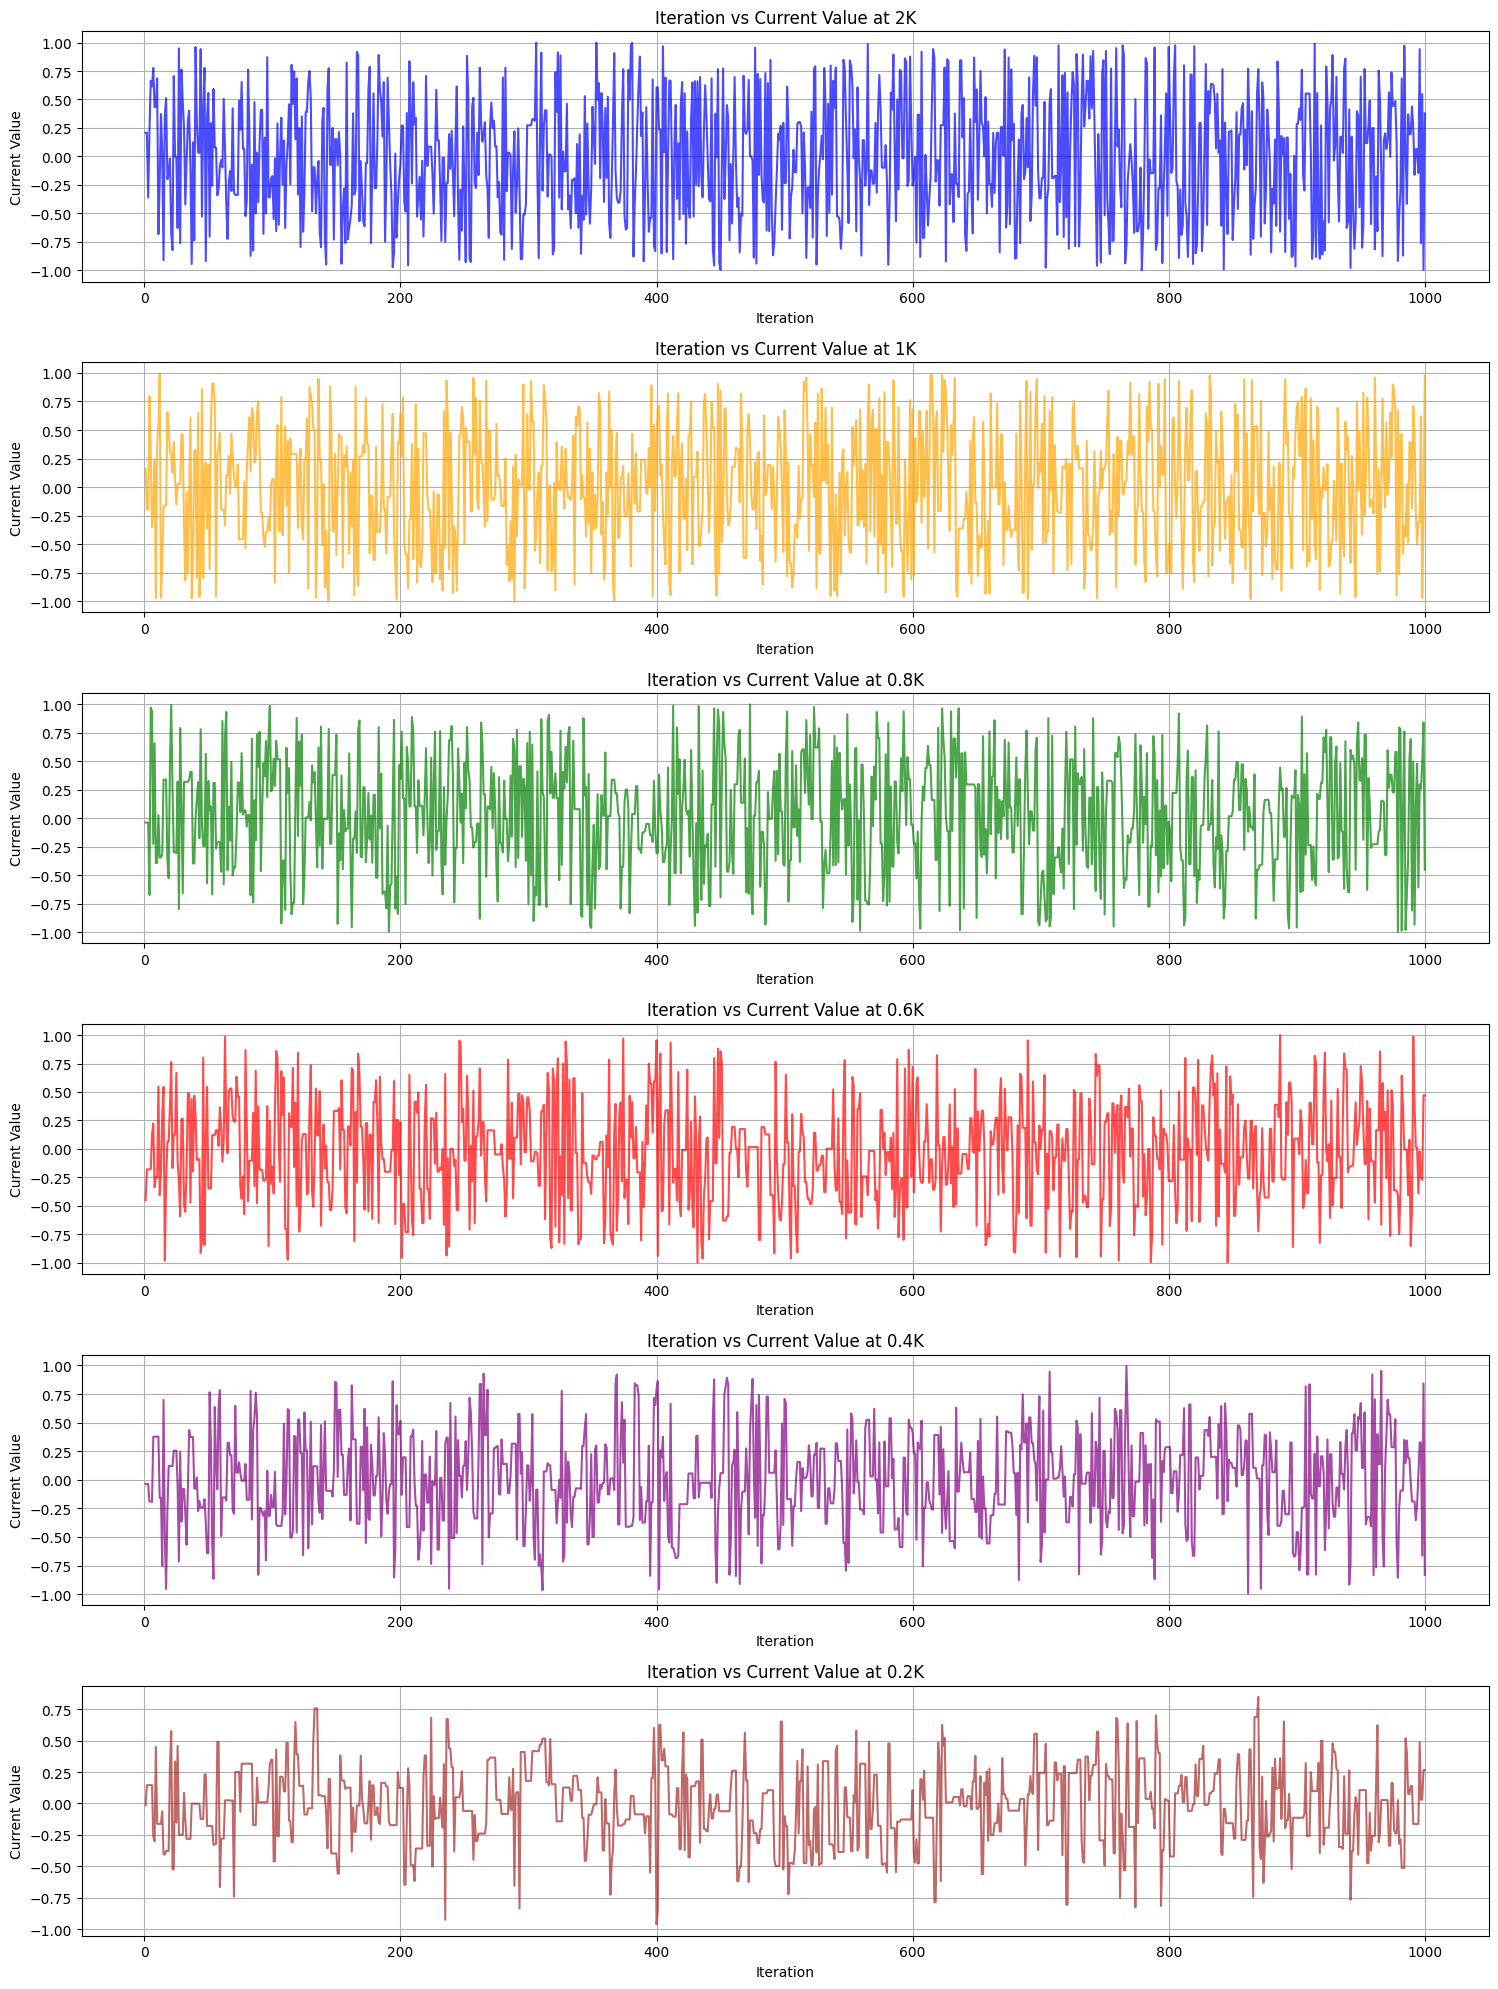

In [86]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
temperature2 = [2,1,0.8,0.6,0.4,0.2]
# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(15, 20))

# Flatten the axis for easier indexing
axs = axs.flatten()

for i, (temp, color) in enumerate(zip(temperature2, colors)):
    # Run simulated annealing for current temperature
    result = simulated_annealing(temp)

    # Plot iteration vs current value
    axs[i].plot(result[0], result[1], color=color, alpha=0.7)
    axs[i].set_title(f'Iteration vs Current Value at {temp}K')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Current Value')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

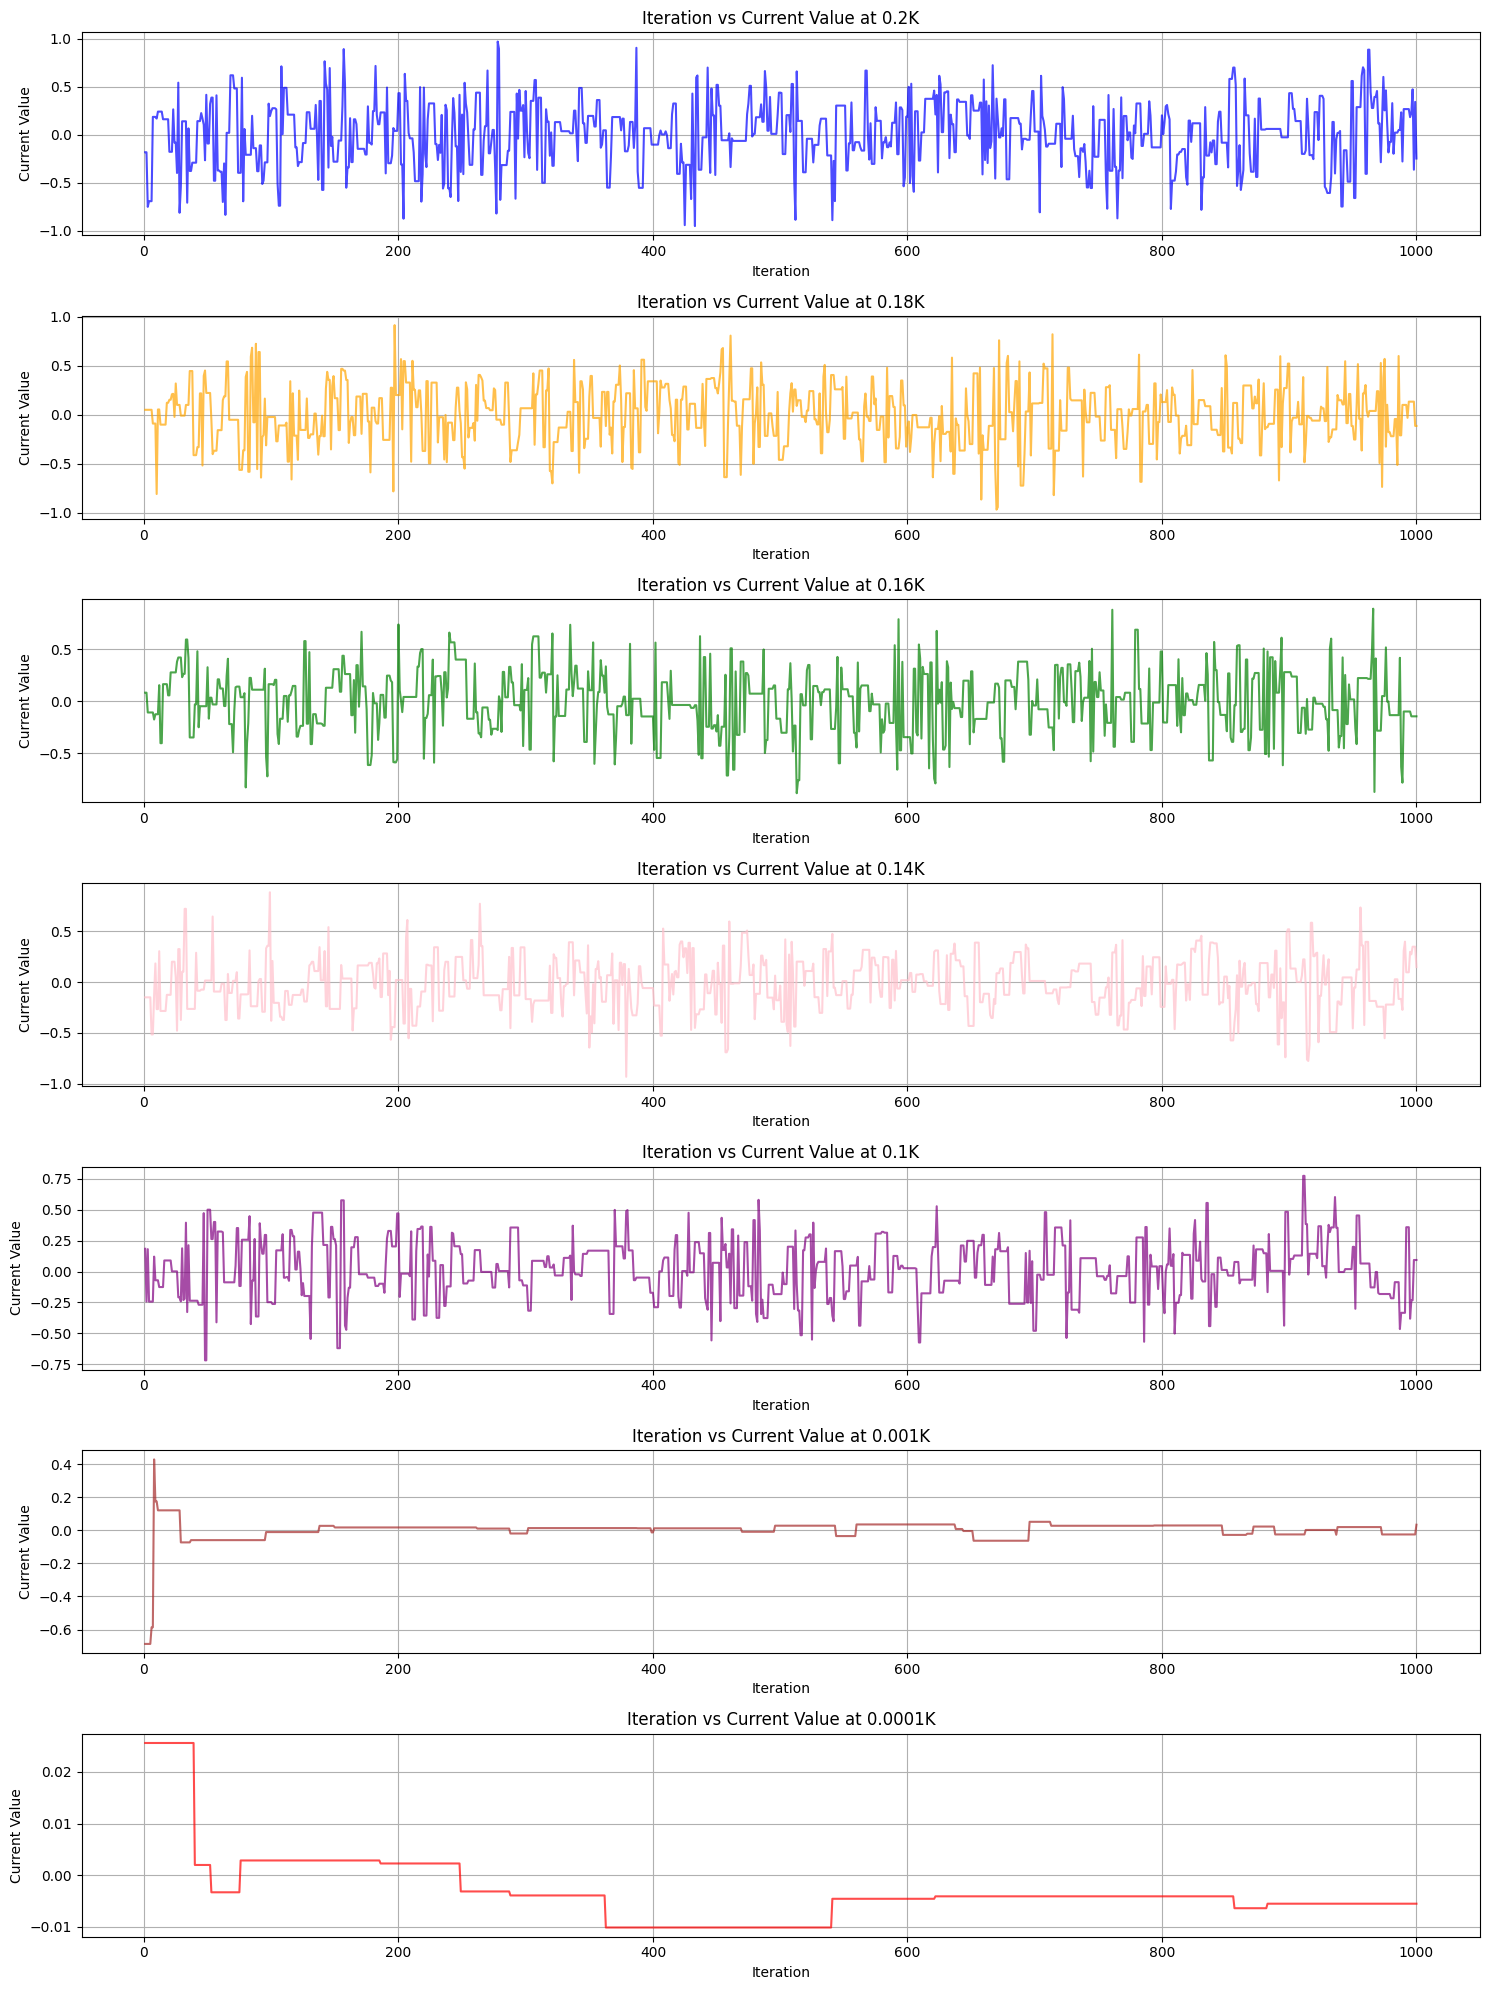

In [99]:
colors = ['blue', 'orange', 'green', 'pink', 'purple', 'brown','red']
temperature3 = [0.2,0.18,0.16,0.14,0.1,0.001,0.0001]
# Create subplots
fig, axs = plt.subplots(7, 1, figsize=(15, 20))

# Flatten the axis for easier indexing
axs = axs.flatten()

for i, (temp, color) in enumerate(zip(temperature3, colors)):
    # Run simulated annealing for current temperature
    result = simulated_annealing(temp)

    # Plot iteration vs current value
    axs[i].plot(result[0], result[1], color=color, alpha=0.7)
    axs[i].set_title(f'Iteration vs Current Value at {temp}K')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Current Value')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [100]:
for temp in temperature3:
  print(f"Mean of at temperature {temp}: {findmean(temp)}")

Mean of at temperature 0.2: -0.015331548529385376
Mean of at temperature 0.18: -0.012066123856011442
Mean of at temperature 0.16: 0.003672588982887934
Mean of at temperature 0.14: -0.02932369071509411
Mean of at temperature 0.1: 0.022636985638851418
Mean of at temperature 0.001: 0.007547115941461399
Mean of at temperature 0.0001: 0.02678364586598069


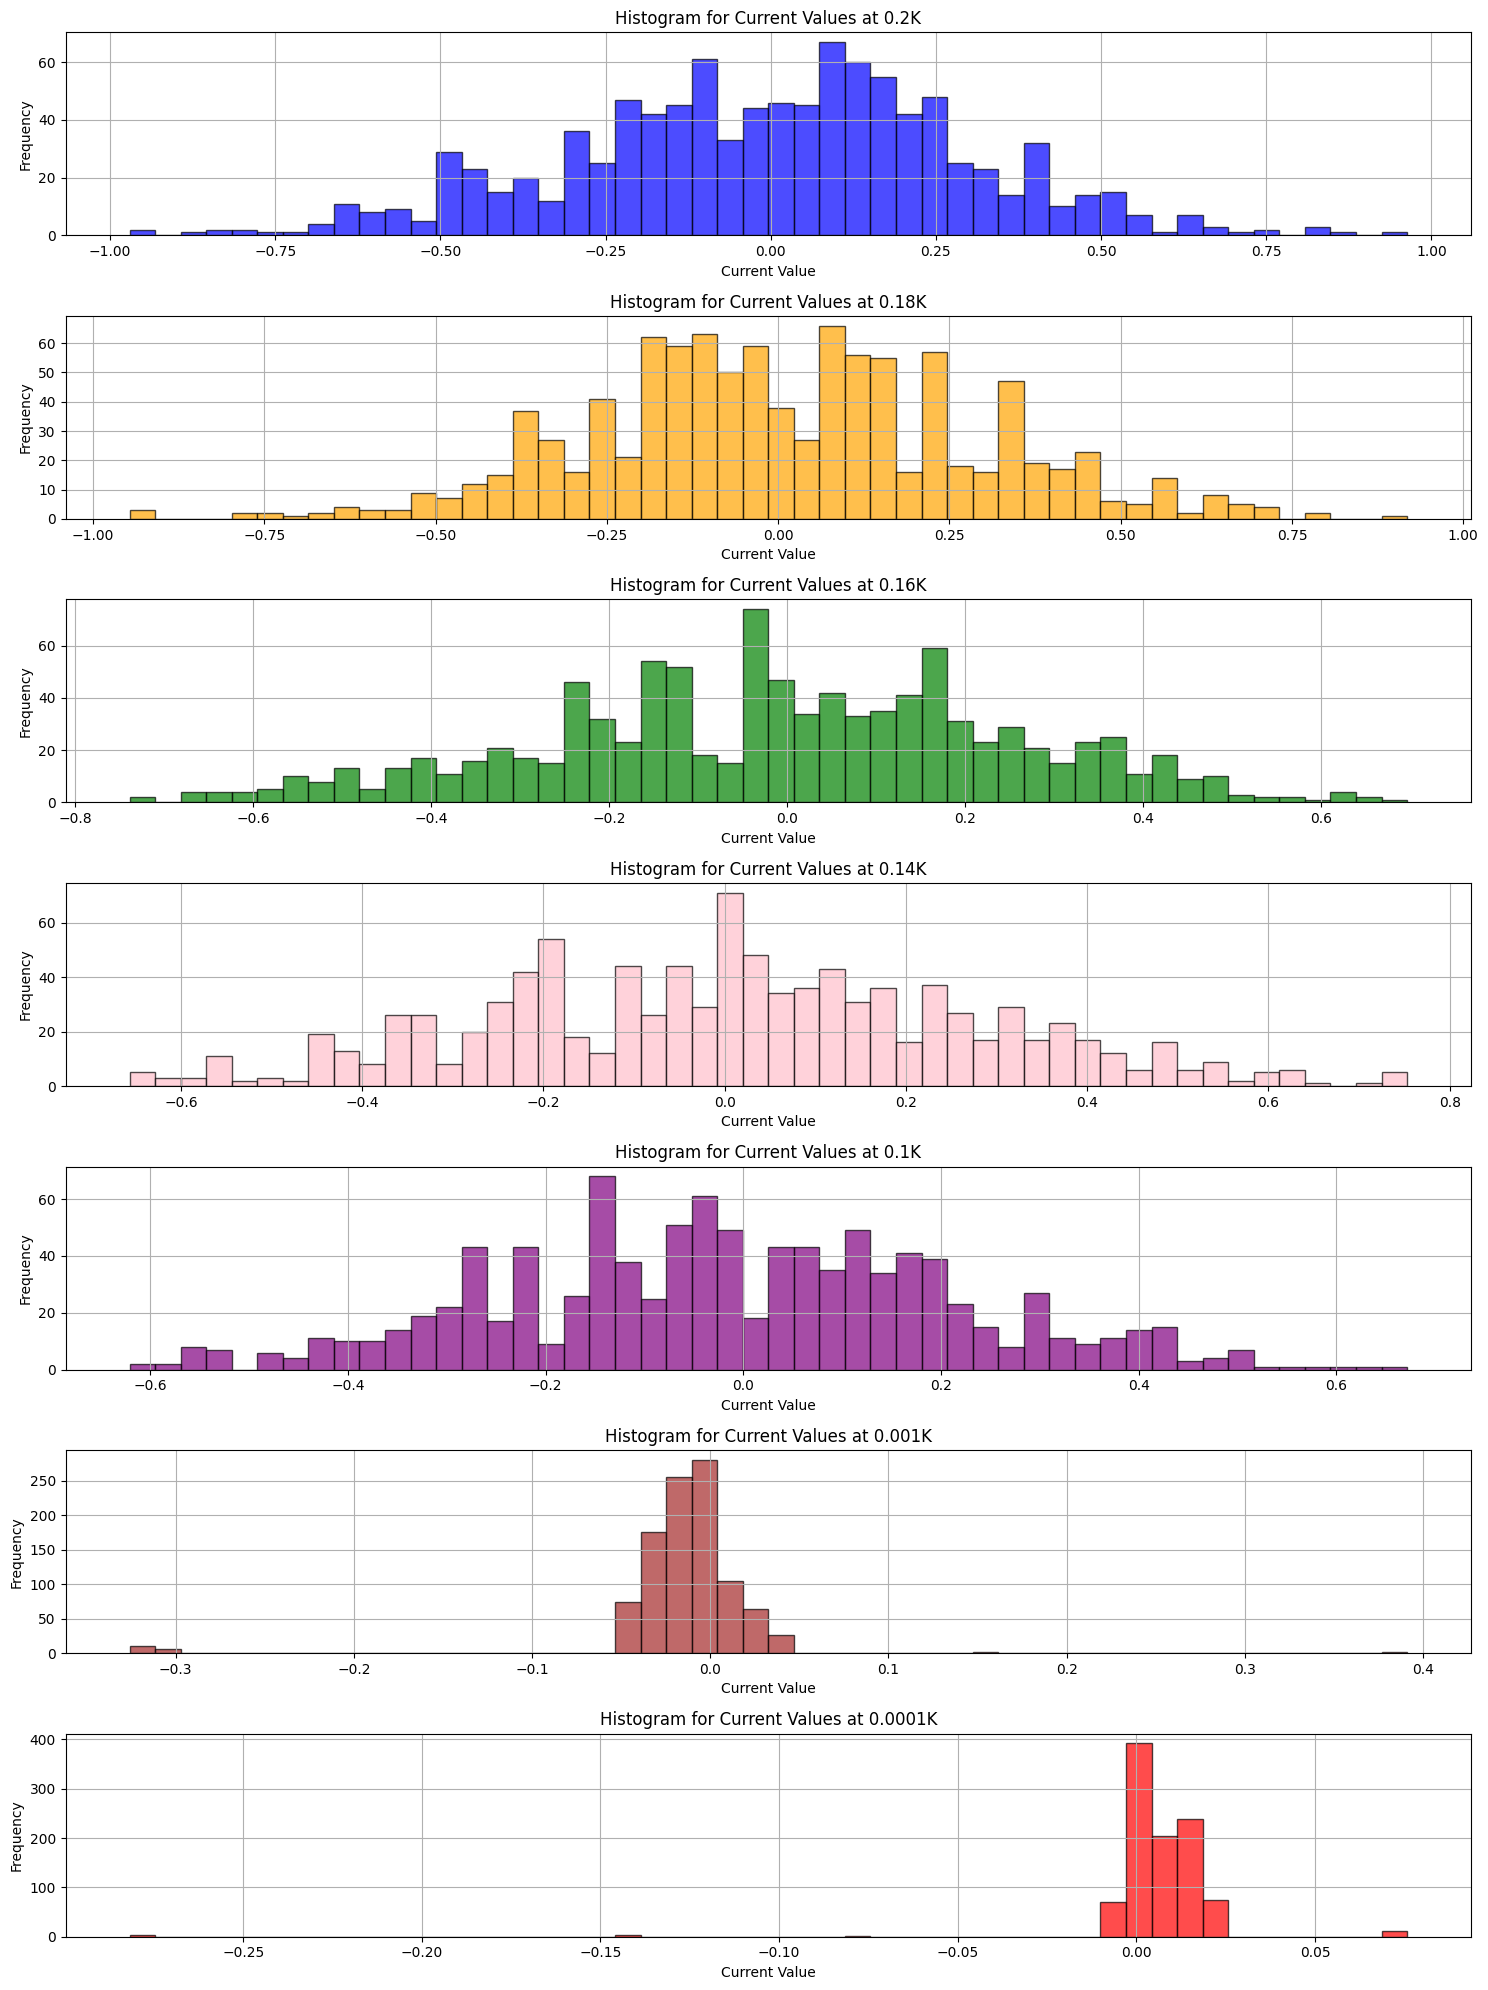

In [101]:
colors = ['blue', 'orange', 'green', 'pink', 'purple', 'brown','red']
temperature3 = [0.2,0.18,0.16,0.14,0.1,0.001,0.0001]
fig, axs = plt.subplots(7, 1, figsize=(15, 20))

for i, (temp, color) in enumerate(zip(temperature3, colors)):
    # Run simulated annealing for current temperature
    result = simulated_annealing(temp)  # Convert temperature to integer

    # Plot histogram of current_r_values
    axs[i].hist(result[1], bins=50, color=color, alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Histogram for Current Values at {temp}K')
    axs[i].set_xlabel('Current Value')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()
